# Preparation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as spss
import plotly.express as px
import seaborn as sns

import random
import time 
import datetime
from time import strptime

In [2]:
insert_database_option = False
insert_prometheus_option = False
random_client=1


if random_client==1:
    # 1 year of data, every 5 minute. 24*12 = 288
    normal_data_rownumber= 100000
    abnormal_data_row_number=500
    csv_file_name= "rand1.csv"
    customer_name_list = ["RAND001"]
else:
    normal_data_rownumber= 19000
    abnormal_data_row_number=1000
    customer_name_list = ["RAND002"]
    csv_file_name= "rand2.csv"

total_row_number = normal_data_rownumber+abnormal_data_row_number*2


In [3]:
time_start,time_end = '2022-01-01 00:00:00', '2022-12-31 23:59:00'

# Continuous Distribution

## Uniform Distribution

In [4]:
gamma_list = spss.gamma.rvs(a=40000, size=normal_data_rownumber).tolist() # size specifies number of random variates, a is the shape parameter
gamma_list= [int(i) for i in gamma_list]

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

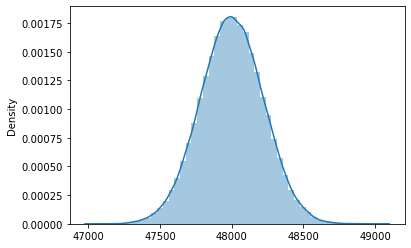

In [5]:
from scipy.stats import gamma
a = 48000
gamma.ppf([0.5, 0.9,0.95, 0.999], a)
gamma_list= gamma.rvs(a, size=normal_data_rownumber)
sns.distplot(gamma_list, kde=True)

In [6]:
uniform_list = spss.uniform.rvs(size=normal_data_rownumber, loc = 0, scale=10).tolist()
normal_list = spss.norm.rvs(size=normal_data_rownumber,loc=5,scale=1).tolist()


# gamma_list = spss.gamma.rvs(a=5, size=normal_data_rownumber).tolist() # size specifies number of random variates, a is the shape parameter
# gamma_list= [i/2 for i in gamma_list]
#exponential_list = spss.expon.rvs(scale=1,loc=45000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation

# Generate data for Peak download_speed
exponential_list = spss.expon.rvs(scale=1000,loc=18000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list = [int(np.round(item)) for item in exponential_list]

exponential_list2 = spss.expon.rvs(scale=1000,loc=45000,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list2 = [int(np.round(item)) for item in exponential_list2]


poisson_list = spss.poisson.rvs(mu=3, size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation



binomial_list = spss.binom.rvs(n=10,p=0.8,size=normal_data_rownumber).tolist() # n = number of trials, p = probability of success, size = number of times to repeat the trials
bernoulli_list = spss.bernoulli.rvs(size=normal_data_rownumber,p=0.6).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list = [i*10 for i in bernoulli_list]

continuous_distribution = [uniform_list,normal_list,exponential_list2,exponential_list]
discrete_distribution = [binomial_list,poisson_list,bernoulli_list]

column_names = ["uniform","normal","exponential_list2","exponential","binomial","poisson","bernoulli"]

continuous_df = pd.DataFrame(continuous_distribution).T.round(2)
discrete_df =  pd.DataFrame(discrete_distribution).T
normal_data_df = pd.concat([continuous_df,discrete_df],axis=1)
normal_data_df.columns = column_names
normal_data_df


,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,4.67,5.28,45540.0,18874.0,8,4,0
1,0.46,4.23,45283.0,18471.0,8,1,10
2,2.13,5.07,45421.0,18892.0,8,2,0
3,7.94,6.71,45148.0,20437.0,8,0,10
4,6.20,5.87,46021.0,19004.0,6,4,10
...,...,...,...,...,...,...,...
99995,6.99,5.73,45294.0,18290.0,8,4,0
99996,5.20,4.83,45198.0,18751.0,8,5,0
99997,9.89,3.90,46132.0,19074.0,9,2,10
99998,4.34,4.63,46566.0,19588.0,9,2,0


In [7]:
uniform_list_abnormal_upper = spss.uniform.rvs(size=abnormal_data_row_number, loc = 10, scale=10).tolist()
uniform_list_abnormal_lower = spss.uniform.rvs(size=abnormal_data_row_number, loc = -10, scale=10).tolist()

uniform_abnormal= uniform_list_abnormal_upper+uniform_list_abnormal_lower

abnormal_data= [uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal]


In [8]:
abnormal_data_row_number*=2
uniform_list_abnormal = spss.uniform.rvs(size=abnormal_data_row_number, loc = 5, scale=10).tolist()
normal_list_abnormal = spss.norm.rvs(size=abnormal_data_row_number,loc=10,scale=1).tolist()

exponential_list_abnormal = spss.expon.rvs(scale=1000,loc=22000,size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list_abnormal = [int(np.round(item)) for item in exponential_list_abnormal]

exponential_list_abnormal2 = spss.expon.rvs(scale=1000,loc=50000,size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
exponential_list_abnormal2 = [int(np.round(item)) for item in exponential_list_abnormal2]


poisson_list_abnormal = spss.poisson.rvs(mu=8, size=abnormal_data_row_number).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation



binomial_list_abnormal = spss.binom.rvs(n=15,p=0.8,size=abnormal_data_row_number).tolist() # n = number of trials, p = probability of success, size = number of times to repeat the trials
bernoulli_list_abnormal = spss.bernoulli.rvs(size=abnormal_data_row_number,p=0.9).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list_abnormal = [i*10 for i in bernoulli_list_abnormal]

continuous_distribution_abnormal = [uniform_list_abnormal,normal_list_abnormal,exponential_list_abnormal2,exponential_list_abnormal]
discrete_distribution_abnormal = [binomial_list_abnormal,poisson_list_abnormal,bernoulli_list_abnormal]

column_names = ["uniform","normal","exponential_list2","exponential","binomial","poisson","bernoulli"]

continuous_df_abnormal = pd.DataFrame(continuous_distribution_abnormal).T.round(2)
discrete_df_abnormal =  pd.DataFrame(discrete_distribution_abnormal).T
abnormal_data_df = pd.concat([continuous_df_abnormal,discrete_df_abnormal],axis=1)
abnormal_data_df.columns = column_names
abnormal_data_df.head()


,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,14.55,9.17,50179.0,22334.0,12,6,10
1,6.05,11.98,50349.0,22682.0,9,5,10
2,12.34,9.33,51016.0,22480.0,14,7,10
3,14.80,10.02,50443.0,22364.0,11,6,10
4,11.48,10.64,50433.0,24469.0,12,5,10


In [9]:
abnormal_data_df=abnormal_data_df.round(0)
final_data =  pd.concat([normal_data_df ,abnormal_data_df])


# Combine them together

In [10]:
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data

,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli
0,8.51,5.46,45332.0,18633.0,9,3,10
1,8.28,6.02,45164.0,19583.0,9,5,10
2,6.80,4.52,45754.0,19254.0,10,5,0
3,4.09,4.12,47263.0,20881.0,8,1,0
4,2.49,7.17,45749.0,18091.0,8,0,0
...,...,...,...,...,...,...,...
100995,8.64,7.59,45399.0,18185.0,6,1,10
100996,3.38,4.25,47036.0,18013.0,7,4,10
100997,9.11,3.08,45392.0,18505.0,7,7,0
100998,2.74,6.80,46089.0,18658.0,8,1,0


# Transform generated Data into Gyan-core-stats format

Things need to do:

## 1. Generate 12-7 = 5 More columns


In [14]:
bernoulli_list1 = spss.bernoulli.rvs(size=total_row_number,p=0.1).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list2 = spss.bernoulli.rvs(size=total_row_number,p=0.2).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list3 = spss.bernoulli.rvs(size=total_row_number,p=0.3).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list4 = spss.bernoulli.rvs(size=total_row_number,p=0.4).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list5 = spss.bernoulli.rvs(size=total_row_number,p=0.5).tolist() # p = probability of success, size = number of times to repeat the trial

In [15]:
# fake 4 customer IDs

nunique_customers= len(customer_name_list)
mapping_list=[]
for num in range(nunique_customers):
    new_customer =  [customer_name_list[num] for i in range(int(total_row_number/nunique_customers))]
    mapping_list.extend(new_customer)
    
assert len(mapping_list) == total_row_number



In [16]:

random.shuffle(mapping_list)


## Generate statstimestamp column

In [17]:
## generate timestamp
timestamp_list = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range(time_start, time_end,
                                      freq='5T'))
       .between_time('00:00','23:59')
       .index.strftime('%Y-%m-%d %H:%M:%S')
       .tolist()
)

timestamp_list = timestamp_list[:total_row_number]

In [18]:
assert len(timestamp_list) == final_data.shape[0]

In [19]:
last_data= final_data

In [20]:
last_data["bernoulli_list1"] =bernoulli_list1
last_data["bernoulli_list2"] =bernoulli_list2
last_data["bernoulli_list3"] =bernoulli_list3
last_data["bernoulli_list4"] =bernoulli_list4
last_data["bernoulli_list5"] =bernoulli_list5
last_data["mapping_list"]=mapping_list
last_data["timestamp_list"]=timestamp_list

In [21]:
last_data

,uniform,normal,exponential_list2,exponential,binomial,poisson,bernoulli,bernoulli_list1,bernoulli_list2,bernoulli_list3,bernoulli_list4,bernoulli_list5,mapping_list,timestamp_list
0,8.51,5.46,45332.0,18633.0,9,3,10,0,0,0,0,0,RAND001,2022-01-01 00:00:00
1,8.28,6.02,45164.0,19583.0,9,5,10,0,0,0,1,1,RAND001,2022-01-01 00:05:00
2,6.80,4.52,45754.0,19254.0,10,5,0,0,0,0,0,1,RAND001,2022-01-01 00:10:00
3,4.09,4.12,47263.0,20881.0,8,1,0,0,0,1,1,1,RAND001,2022-01-01 00:15:00
4,2.49,7.17,45749.0,18091.0,8,0,0,0,0,0,1,1,RAND001,2022-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,8.64,7.59,45399.0,18185.0,6,1,10,0,0,0,1,0,RAND001,2022-12-17 16:15:00
100996,3.38,4.25,47036.0,18013.0,7,4,10,0,1,1,0,1,RAND001,2022-12-17 16:20:00
100997,9.11,3.08,45392.0,18505.0,7,7,0,0,0,0,0,1,RAND001,2022-12-17 16:25:00
100998,2.74,6.80,46089.0,18658.0,8,1,0,0,0,0,1,0,RAND001,2022-12-17 16:30:00


# Insert into Database

In [22]:
last_data.columns

final_df = pd.DataFrame()

In [23]:
# total_attached_user  -> 
# cell_number
# 
final_df["client_id"] = last_data["mapping_list"]
final_df["stats_timestamp"] = last_data["timestamp_list"]
final_df["total_attached_user"] = last_data["bernoulli_list5"]
final_df["total_rejected_user"] = last_data["bernoulli_list4"]
final_df["peak_upload_speed"] = last_data["exponential_list2"]
final_df["peak_download_speed"] = last_data["exponential"]
final_df["enodeb_shutdown_count"] = last_data["bernoulli_list3"]
final_df["handover_failure_count"] = last_data["bernoulli_list2"]
final_df["bearer_active_user_count"] = last_data["bernoulli_list1"]
final_df["bearer_rejected_user_count"] = last_data["bernoulli"]
final_df["total_users"] = last_data["binomial"]
final_df["total_dropped_packets"] = last_data["poisson"]
final_df["enodeb_connected_count"] = last_data["normal"]
final_df["enodeb_connection_status"] = last_data["uniform"]

final_df.to_csv(csv_file_name,index=False)

In [24]:
final_df.to_csv(csv_file_name,index=False)

## Connect with Database

In [25]:
import mysql.connector
# Initiate with Parameters
db_name = "core_stats"
col = "peak_upload_speed"


# Start Database Connection
db_connection = mysql.connector.connect(
    host="10.1.2.10",
    user="gyan",
    password="5Gaa$2022",
    database="gyan_db"
)

# Load data from database and store as pandas Dataframe
df_rand = pd.read_sql(
    'SELECT * FROM gyan_db.core_stats WHERE client_id= "BETBEL01GYN001" AND stats_timestamp>"2022-07-15"'.format(db_name), con=db_connection)



C:\Users\Jijun Du\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [26]:
df_rand.to_csv("rand_1.csv")

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

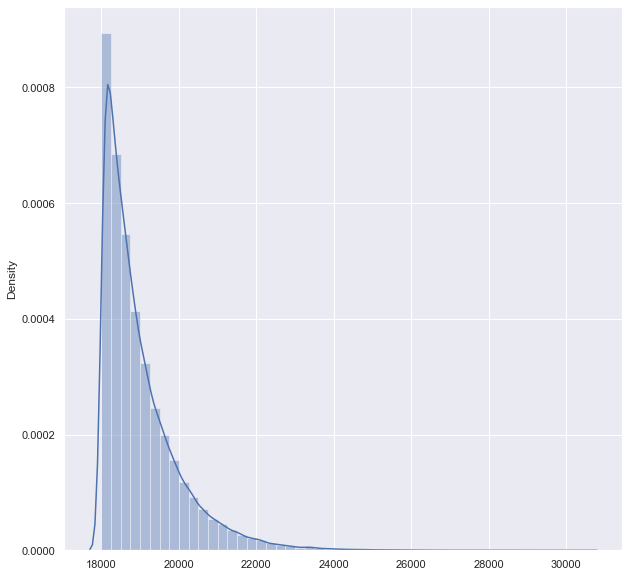

In [27]:
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4

sns.distplot(exponential_list, kde=True)

In [31]:
df = pd.read_csv("Existing_rand_data_after_July15.csv")
df.shape

(45120, 17)

<AxesSubplot:>

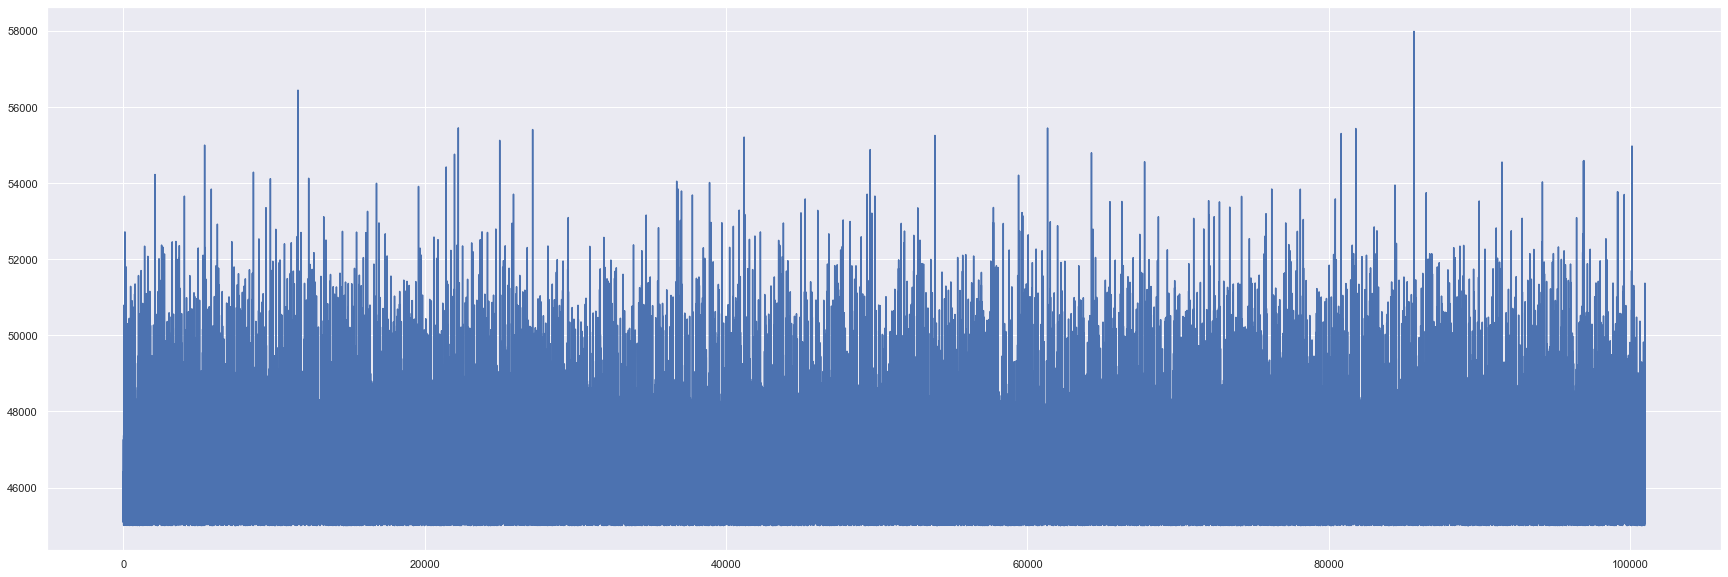

In [32]:
sns.set(rc={"figure.figsize":(30, 10)}) #width=3, #height=4

final_df.peak_upload_speed.plot()



<AxesSubplot:>

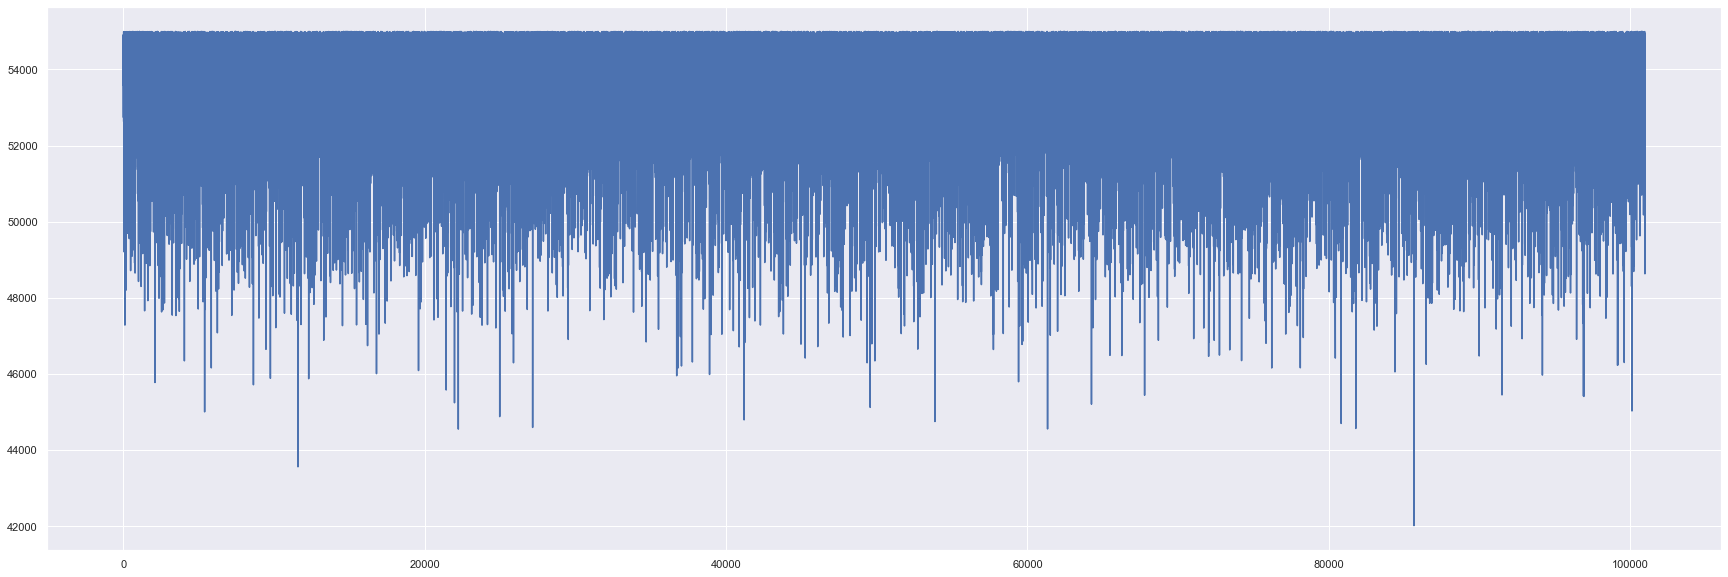

In [33]:
final_df["reverse_peak_upload_speed"]= 100000-final_df.peak_upload_speed
final_df.reverse_peak_upload_speed.plot()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6),dpi=80)
    
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

## Trend+Seasonality+Trend

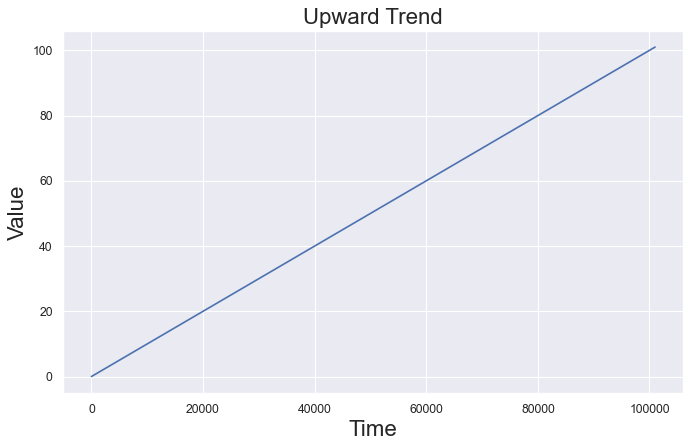

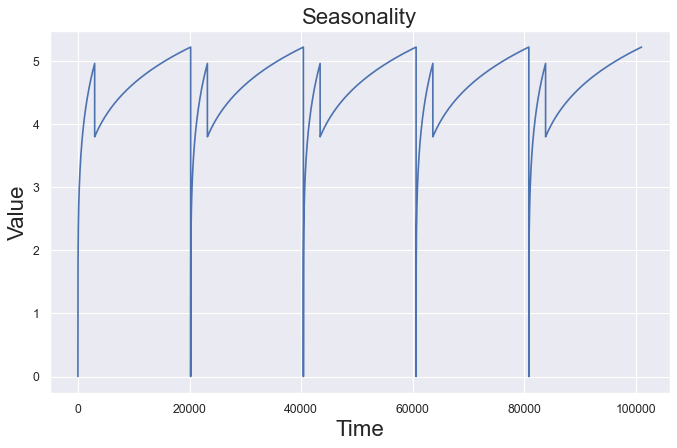

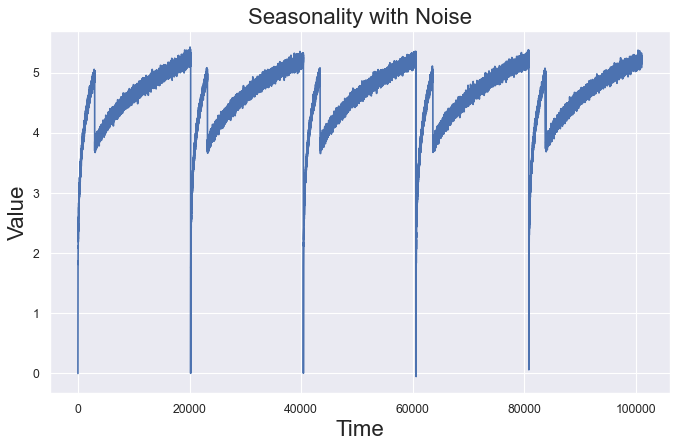

In [35]:
trend_time = np.arange(total_row_number)
trend_values = trend_time*0.001
plot_time_series(trend_time, trend_values, "Upward Trend")


# Just a random pattern
time = np.arange(total_row_number)
values = np.where(time < 3000, time**(1/5), (time)**(1/6))

# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(int(total_row_number/5)):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality")


noise = np.random.randn(total_row_number)*0.05
seasonal += noise
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

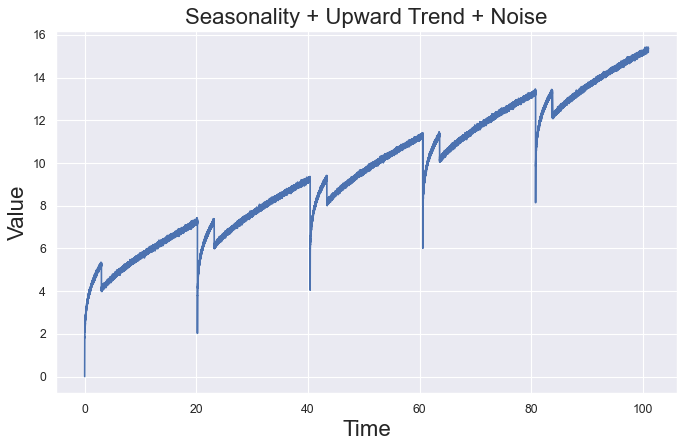

In [36]:
seasonal_upward = seasonal + np.arange(total_row_number)*0.0001

plot_time_series(trend_values, seasonal_upward, label="Seasonality + Upward Trend + Noise")
final_df_copy= final_df.copy()
final_df_copy["peak_upload_speed"]= final_df_copy["peak_upload_speed"]+seasonal_upward

## Peak Upload Speed i

### Peak Upload Speed in New

<AxesSubplot:>

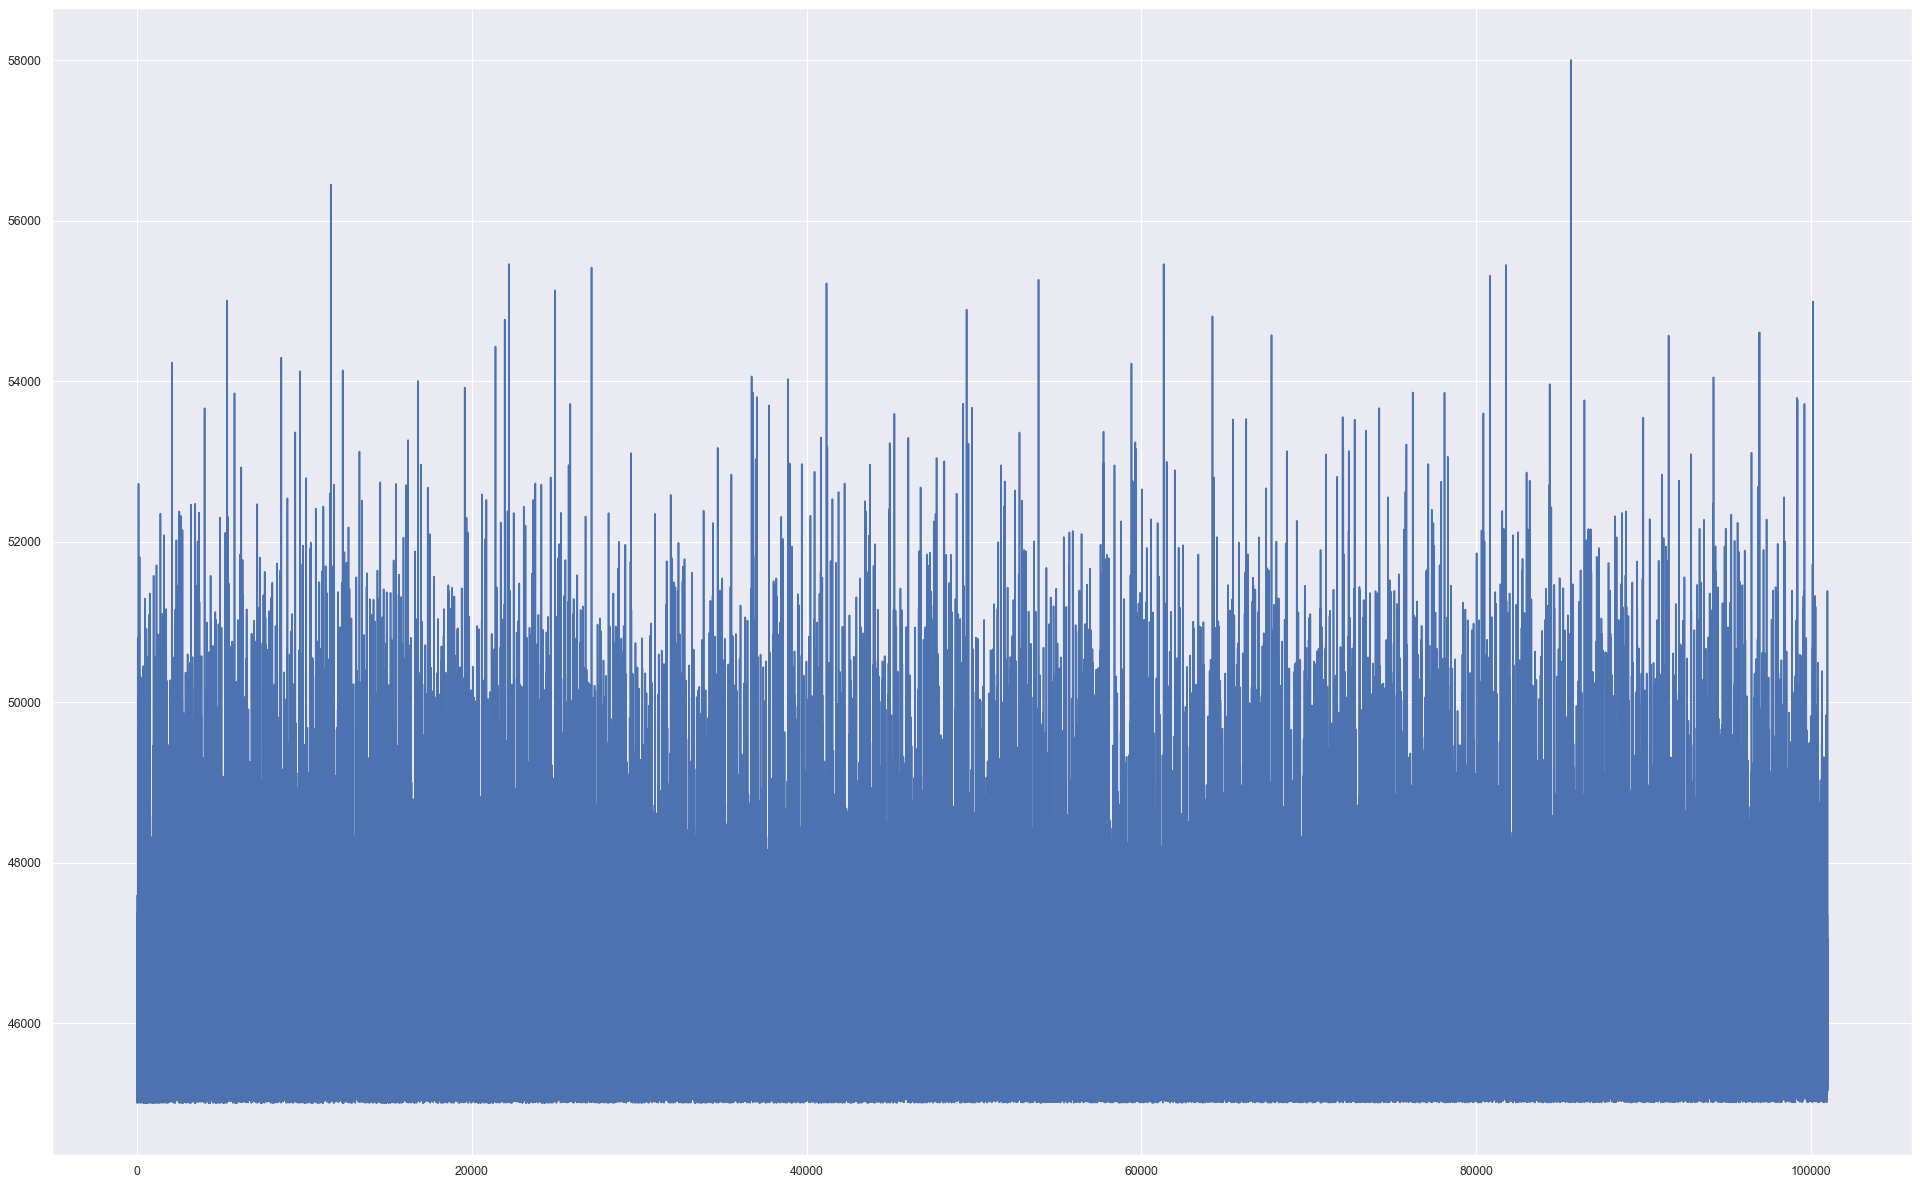

In [37]:
from matplotlib.pyplot import figure

figure(figsize=(30, 19), dpi=80)
final_df_copy["peak_upload_speed"].plot()

<AxesSubplot:>

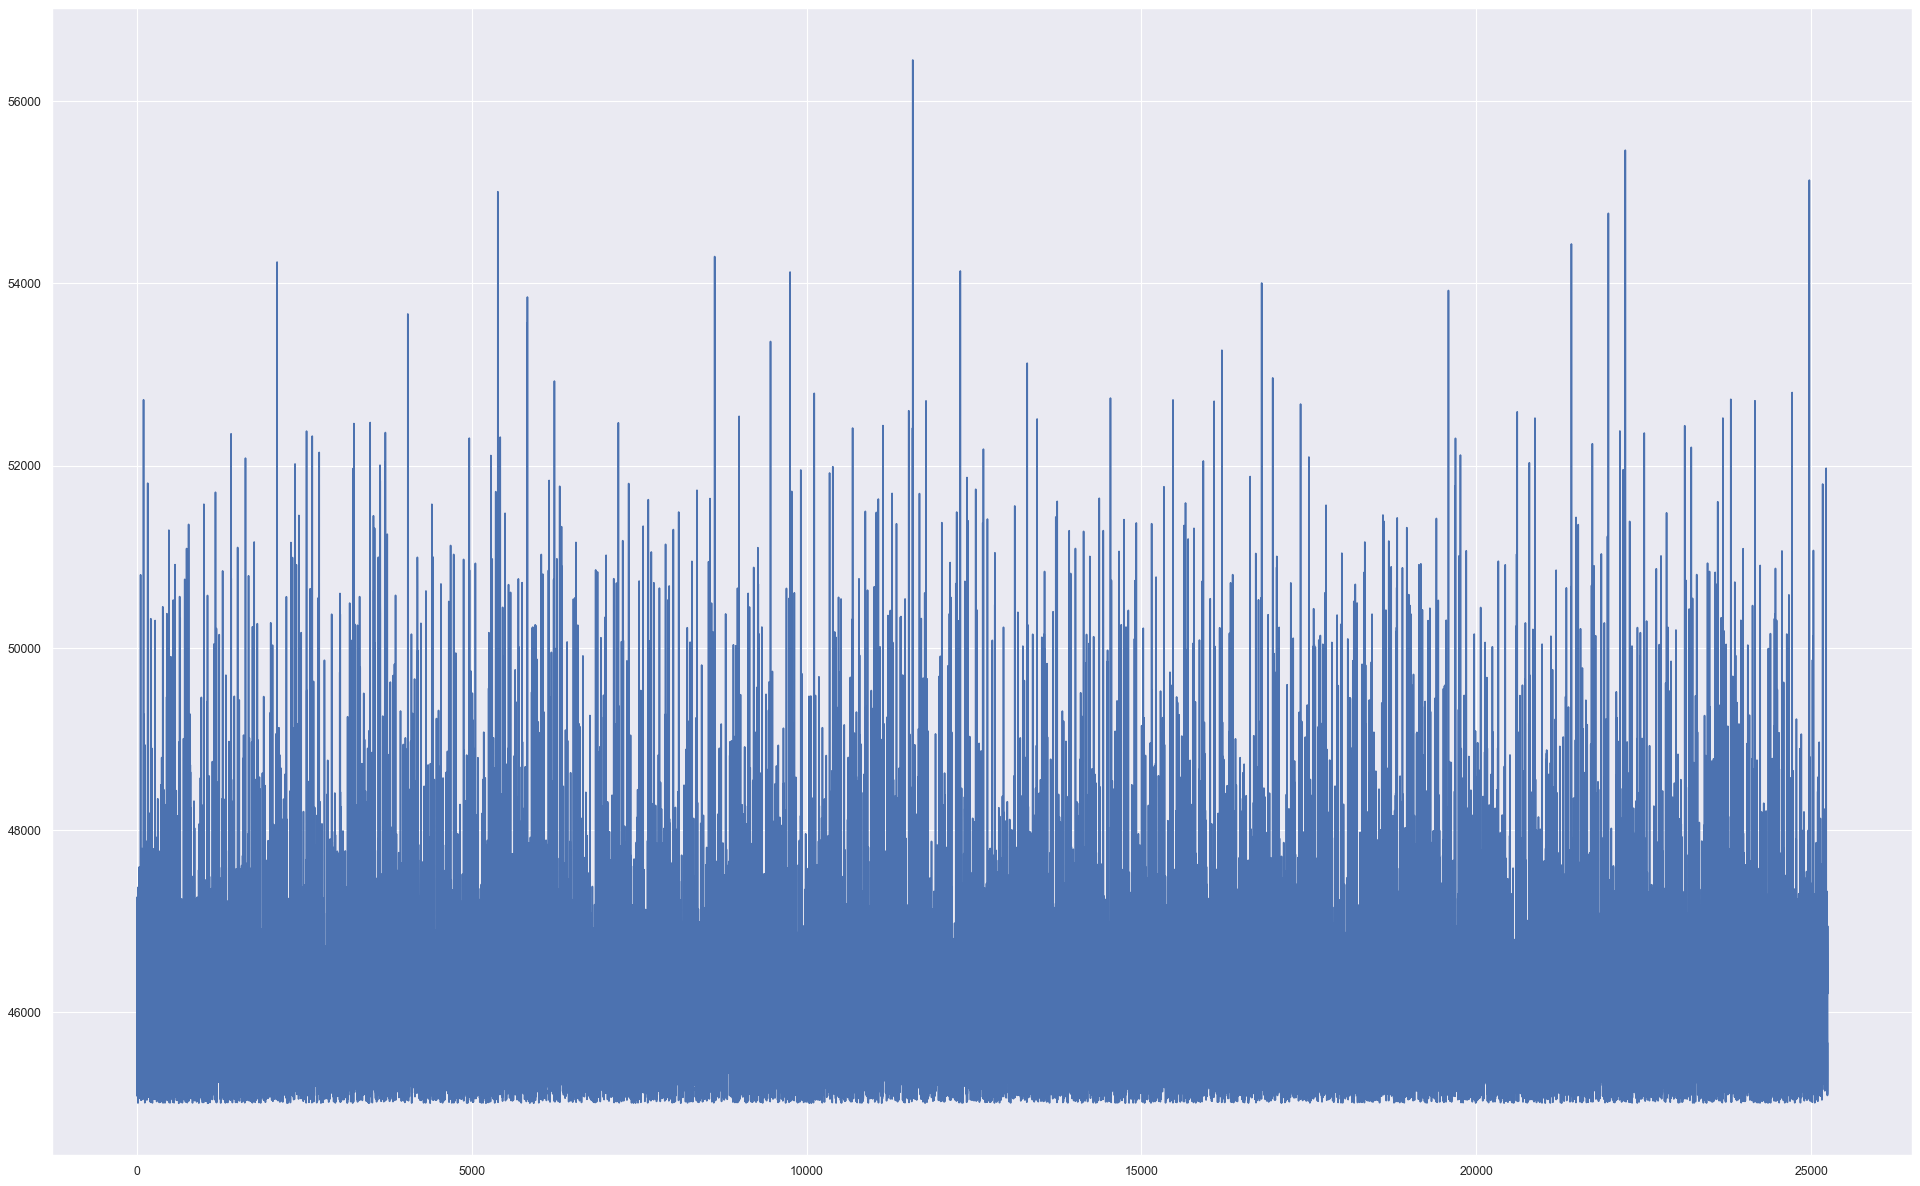

In [38]:
s1= final_df_copy.peak_upload_speed[:int(final_df_copy.shape[0]/4)]
figure(figsize=(30, 19), dpi=80)

s1.plot()

### Peak Upload Speed in Original

In [39]:
df_rand

,client_id,stats_timestamp,total_attached_user,total_rejected_user,peak_upload_speed,peak_download_speed,enodeb_shutdown_count,handover_failure_count,bearer_active_user_count,bearer_rejected_user_count,total_users,total_dropped_packets,enodeb_connected_count,enodeb_connection_status,total_tx_data,total_rx_data
0,BETBEL01GYN001,2022-07-15 00:01:15,0,0,22759,0,0,0,0,0,0,0,0,0.0,None,None
1,BETBEL01GYN001,2022-07-15 00:03:15,0,0,46675,0,0,0,0,0,0,0,0,0.0,None,None
2,BETBEL01GYN001,2022-07-15 00:05:15,0,0,31723,0,0,0,0,0,0,0,0,0.0,None,None
3,BETBEL01GYN001,2022-07-15 00:07:15,0,0,28047,0,0,0,0,0,0,0,0,0.0,None,None
4,BETBEL01GYN001,2022-07-15 00:09:15,0,0,36621,0,0,0,0,0,0,0,0,0.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45115,BETBEL01GYN001,2022-09-21 10:01:55,27,1,46762,15396,10,1,1,1,8,43,10,10.0,None,None
45116,BETBEL01GYN001,2022-09-21 10:03:56,14,0,49018,16710,6,4,0,9,5,31,0,6.0,None,None
45117,BETBEL01GYN001,2022-09-21 10:05:56,10,0,49344,13201,2,3,0,9,7,29,1,2.0,None,None
45118,BETBEL01GYN001,2022-09-21 10:07:56,37,4,41425,18885,2,6,8,6,0,45,2,9.0,None,None


<AxesSubplot:>

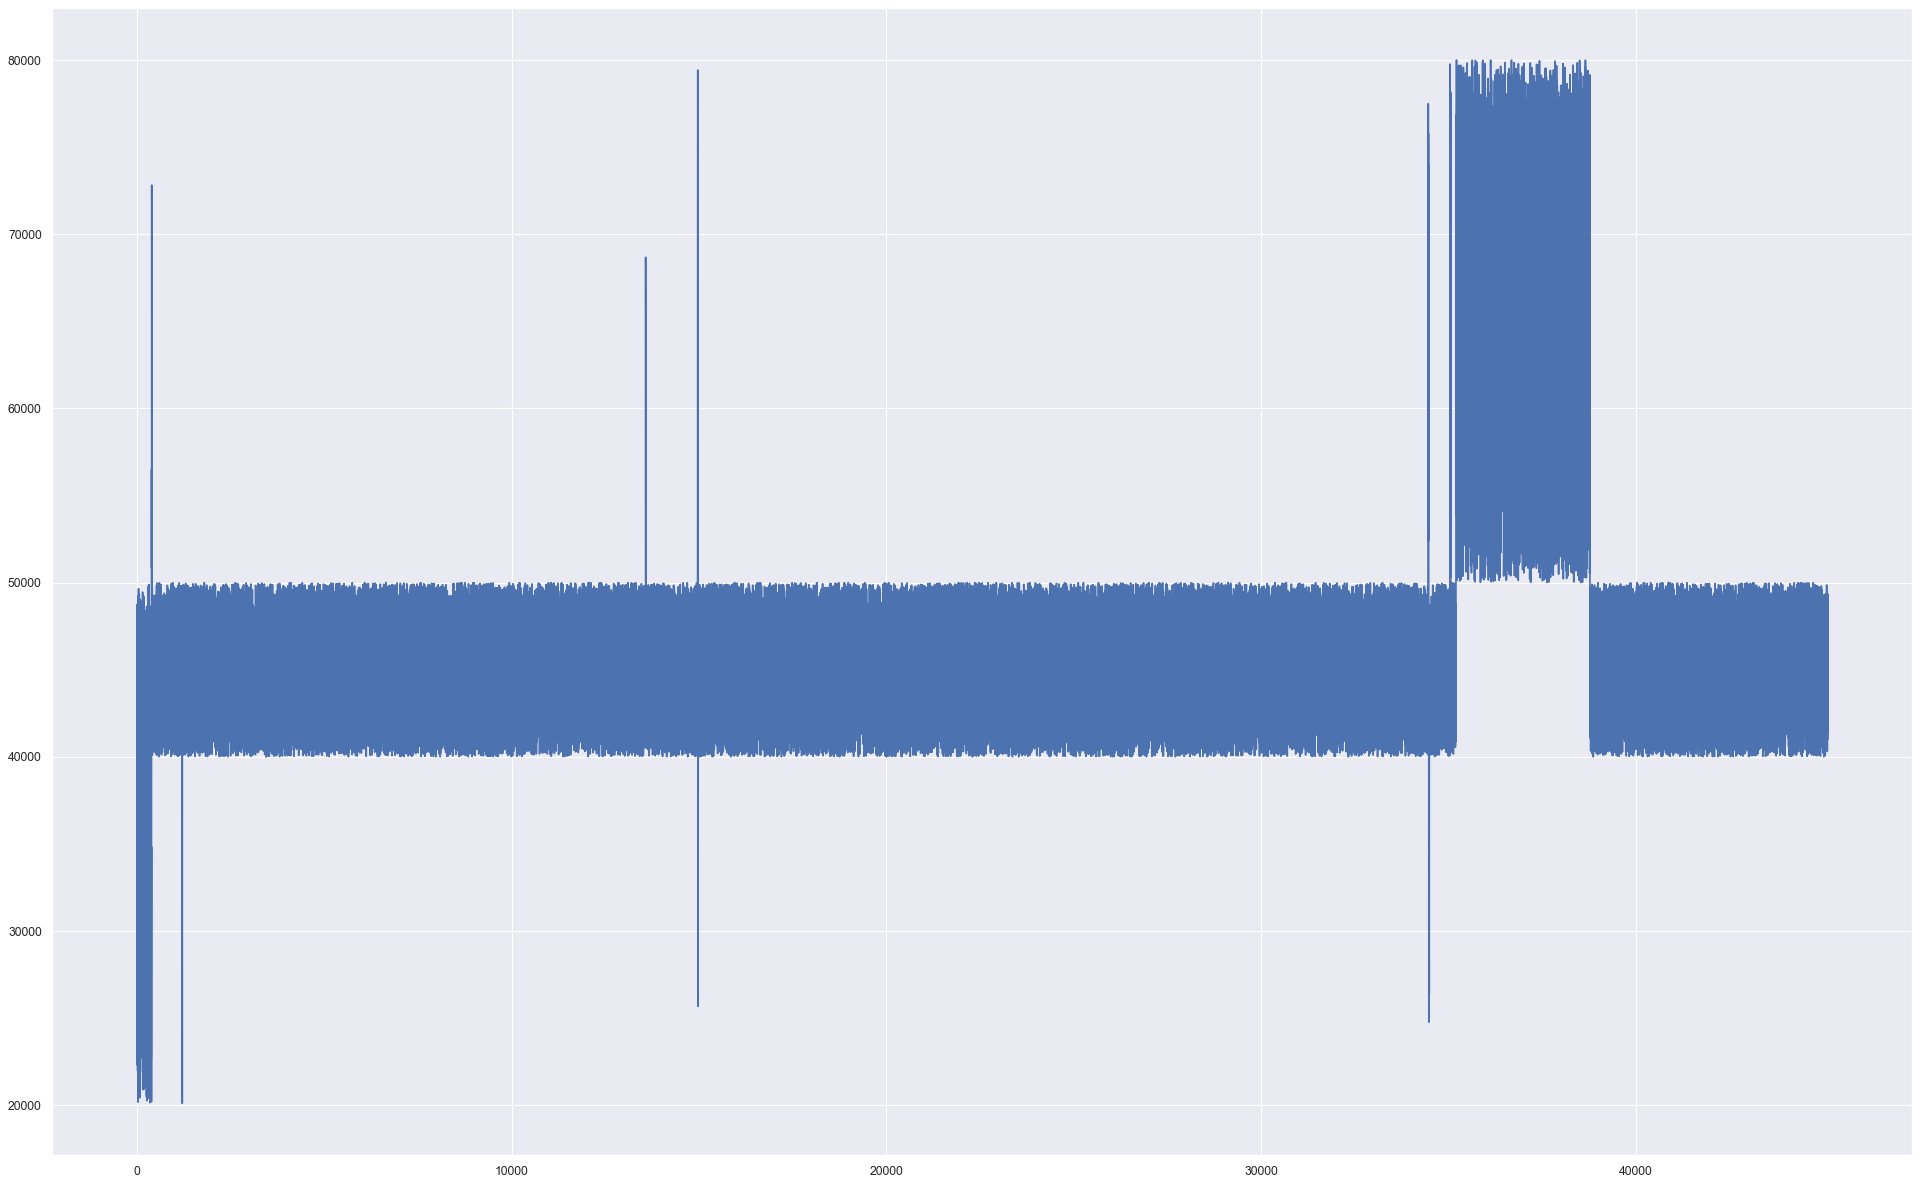

In [40]:
figure(figsize=(30, 19), dpi=80)

df_rand["peak_upload_speed"].plot()

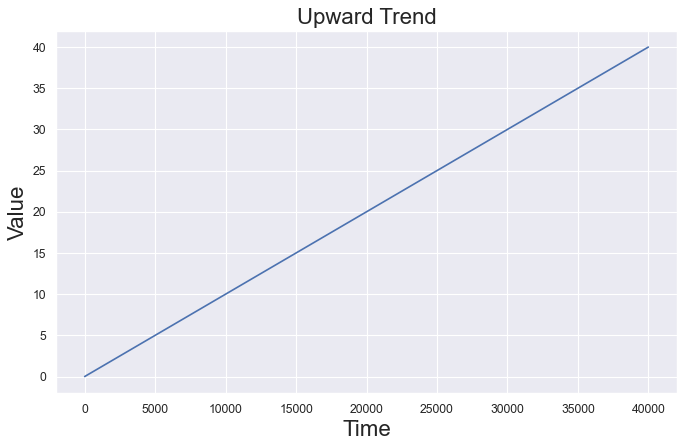

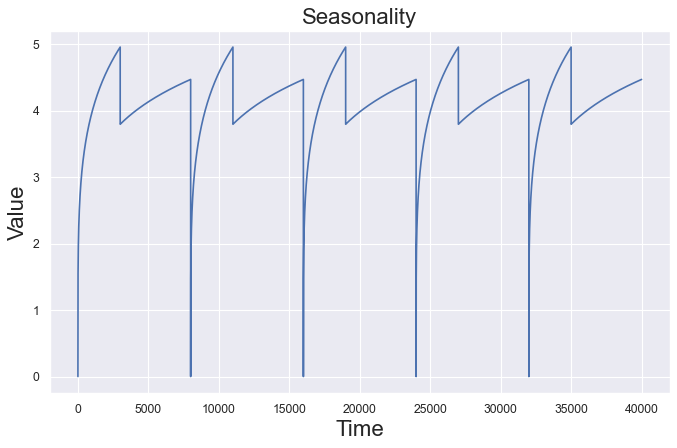

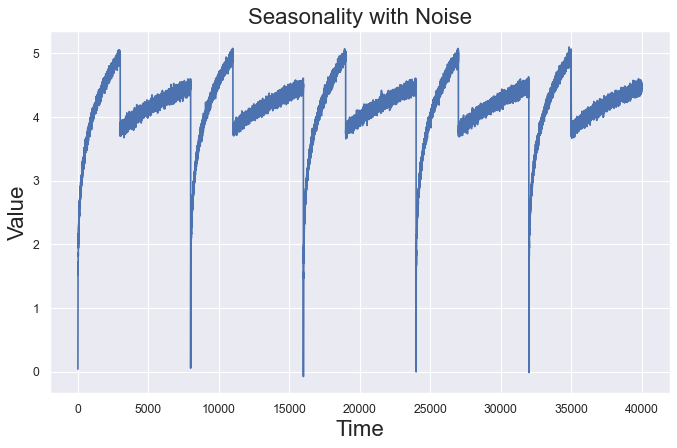

In [41]:

total_row_number= 40000
trend_time = np.arange(total_row_number)
trend_values = trend_time*0.001
plot_time_series(trend_time, trend_values, "Upward Trend")


# Just a random pattern
time = np.arange(total_row_number)
values = np.where(time < 3000, time**(1/5), (time)**(1/6))

# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(int(total_row_number/5)):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality")


noise = np.random.randn(total_row_number)*0.05
seasonal += noise
time_seasonal = np.arange(total_row_number)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")



In [42]:
# Modeling to Detect Anomalies

In [43]:

#--------------------------------------------------------------------------------------------
#---------------------------------Part 1: DB connection--------------------------------------
#--------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import os.path
from scipy.stats import iqr
import numpy as np
import datetime
import time

import mysql.connector
import warnings
warnings.filterwarnings("ignore")





def add_Z_score_column(df,col, z_score_threshold=3):
    col_name =  "Z-score_" + col
    Z_score_list = (df[col] - df[col].mean())/df[col].std(ddof=0)
    Z_score_list= [np.round(x,2) for x in Z_score_list]
    df[col_name]=Z_score_list
    df["label_Z-score_"+col] = [ 1 if (x< -1*z_score_threshold or x>1*z_score_threshold) else 0 for x in df[col_name]]
    
    deviation_list = []
    value_list = df[col]
    mean_value= df[col].mean()

    for item in value_list:
        if mean_value == 0:
            deviation_list.append(0)
        else:
            deviation_list.append(np.round((item-mean_value) / mean_value ,2)) 

    df["deviation_Z-score_"+col]=  deviation_list
    
    return df



def add_outlier_column(df, col, iqr_factor=2, low_quantile=25, upper_quantile=75):
    q3, q1 = np.percentile(df[col], [upper_quantile, low_quantile])

    iqr_v = iqr(df[col])

    upper_v = q3+iqr_factor*iqr_v
    lower_v = q1-iqr_factor*iqr_v
    
    #outliers_removed = [x for x in df[col] if x >= lower_v and x <= upper_v]
    #print(outliers_removed)
    
    outlier_index = df[(df[col] > upper_v) | (df[col] < lower_v)][col].index
    outlier_label = [1 if x in outlier_index else 0 for x in df.index]
    
    df["label_outlier_"+col]  = outlier_label
    
    return df


def reorder_columns(dataframe, col_name, position):
    """Reorder a dataframe's column.
    Args:
        dataframe (pd.DataFrame): dataframe to use
        col_name (string): column name to move
        position (0-indexed position): where to relocate column to
    Returns:
        pd.DataFrame: re-assigned dataframe
    """
    temp_col = dataframe[col_name]
    dataframe = dataframe.drop(columns=[col_name])
    dataframe.insert(loc=position, column=col_name, value=temp_col)
    return dataframe



def insert_anomaly_to_database(current_anomlies):
    for index, row in current_anomlies.iterrows():
        connection = mysql.connector.connect(
            host="10.1.2.10",
            user="gyan",
            password="5Gaa$2022",
            database="gyan_db"
        )

        cursor = connection.cursor()

        MySQL_insert_query = "INSERT INTO tb_export_anomaly_df (client_id, stats_timestamp, attribute_name, attribute_value, attribute_label_Z_score, attribute_deviation, attribute_label_outlier,attribute_mean) VALUES (%s, %s, %s, %s, %s, %s, %s,%s)"

        the_value= (row.client_id, str(row.stats_timestamp),row.Attribute_Name, row.Attribute_Value, row.Attribute_Label_Z_Score, row.Attribute_Deviation_Z, row.Attribute_Label_Outlier, row.attribute_mean)
        
        try:
            cursor.execute(MySQL_insert_query, the_value)
        except:
            print("Record Already Inserted")
            pass

        connection.commit()

    cursor.close()
    print("Insert Complete")


#---------------------------------------------------------------------------------------------
#---------------------------------Part 3: Data Cleaning --------------------------------------
#---------------------------------------------------------------------------------------------

keeped_column_name =list(final_df_copy.columns)
keeped_column_name.remove("client_id")
# keeped_column_name.remove("total_tx_data")
# keeped_column_name.remove("total_rx_data")
keeped_column_name.remove("stats_timestamp")


In [47]:

# Create a new table to store all the computed metrics
Anomaly_table = final_df_copy.copy()

## Statistics Anomalies and Outlier Anomalies

temp_df = Anomaly_table

for col in keeped_column_name:

    temp_df=add_Z_score_column(temp_df,col)
    temp_df=add_outlier_column(temp_df,col)

Anomaly_table=Anomaly_table.append(temp_df, ignore_index = True)

filter_col = [col for col in Anomaly_table if col.startswith('label')]





#------------------------------------------------------------------------------------------
#---------------------------------Part 4: Prepare Export Anomaly Dataframe-----------------
#------------------------------------------------------------------------------------------

# folder_path = "C:\Users\Jijun Du\Desktop\Main_Anomaly_Detection\Generated_csv\"
# Filter columns with at least one record that have anomaly label
export_anomaly_df= pd.DataFrame()
for col in keeped_column_name:
    condition= (Anomaly_table["label_Z-score_"+ col]==1) | (Anomaly_table["label_outlier_"+col]==1)


    subset_columns=["client_id","stats_timestamp",col,"label_Z-score_"+col, "deviation_Z-score_"+col,"label_outlier_"+col]
    #print("{} rows of anomaly detected for column {}".format(sum(condition),col))
    
    subset_Summary= Anomaly_table[condition][subset_columns]
    
    subset_Summary["Attribute_Name"] = col
    
    subset_Summary = reorder_columns(subset_Summary,"Attribute_Name",2)
    #subset_Summary.drop(col, axis=1)
#print(subset_Summary.shape[1])
#print(subset_Summary.columns)
    subset_Summary=subset_Summary.rename(columns={str(col):"Attribute_Value","label_Z-score_"+col: "Attribute_Label_Z_Score",  "deviation_Z-score_"+col: "Attribute_Deviation_Z","label_outlier_"+col: "Attribute_Label_Outlier"})
    
    export_anomaly_df=export_anomaly_df.append(subset_Summary, ignore_index = True)


    
mean_list= []
for i in range(export_anomaly_df.shape[0]):
    try:

        attribute_condition = export_anomaly_df.iloc[i].Attribute_Name
        client_condition = mean_summary["client_id"] == export_anomaly_df.iloc[i].client_id
        value= mean_summary[client_condition][attribute_condition].values[0]
        mean_list.append(value)
    except:
        mean_list.append(0)
        
export_anomaly_df["attribute_mean"]= mean_list


#------------------------------------------------------------------------------------------
#---------------------------------Part 5: Get Current Anomalies and Insert-----------------
#------------------------------------------------------------------------------------------

time_interval = datetime.datetime.now() - datetime.timedelta(minutes=120)
#current_anomlies= export_anomaly_df[export_anomaly_df.stats_timestamp > time_interval].reset_index()


# if current_anomlies.shape[0]>0:
#     insert_anomaly_to_database(current_anomlies)
#     print("Anomalies Insert Completed")
# else:
#     print("No Anomalies Detected")

In [48]:
export_anomaly_df[export_anomaly_df["Attribute_Name"]!="reverse_peak_upload_speed"].shape[0]/8

10074.25

In [49]:
from pandas_profiling import ProfileReport
import pandas as pd


df = pd.read_csv("randomized_data_with_distribution_1year_V2.csv")

profile = ProfileReport(df, title="Pandas Profiling Report")

profile.to_file("randomized_data_with_distribution_1year_V2.html")


Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
import numpy as np
import mysql.connector
import pandas as pd
from pandas_profiling import ProfileReport

# Initiate with Parameters
db_name = "core_stats"
col = "peak_upload_speed"


# Start Database Connection
db_connection = mysql.connector.connect(
    host="10.1.2.10",
    user="gyan",
    password="5Gaa$2022",
    database="gyan_db"
)
# # Create Database Cursor for SQL Queries
# mycursor = db_connection.cursor()
# mycursor.execute("SELECT * FROM {} LIMIT 5".format(db_name))

# myresult = mycursor.fetchall()
# for x in myresult:
#     print(x)


# Load data from database and store as pandas Dataframe
df = pd.read_sql(
    'SELECT * FROM gyan_db.core_stats WHERE client_id in ("BETBEL01GYN001")'.format(db_name), con=db_connection)



profile = ProfileReport(df, title="Original Randomized Data")

profile.to_file("randomized_data_without_distribution.html")


Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]